In [65]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import codecs

# dirname = '张学良'
dirname = '文章'
train = []

fp=codecs.open(f'{dirname}/全文分词.txt','r',encoding='UTF-8')
data=fp.read()
fp.close()
print('finish')

finish


In [66]:
from collections import defaultdict
texts = data.split()
text_dic = defaultdict(int)
for word in texts:
    text_dic[word] += 1

# 去除低频词
# low_freq_words = [word for word, freq in text_dic.items() if freq < 5]
# high_freq_words = [word for word, freq in text_dic.items() if freq >= 3]

# 读取文档
with open(f'{dirname}/全文分词.txt', 'r') as f:
    docs = [[word for word in line.strip().split() if text_dic[word]] for line in f]

In [67]:
from gensim.models import Phrases
# 向文档中添加双字母组和三字母组（仅出现10次或以上的文档）。
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])
 
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # token是一个二元组，添加到文档中。
            docs[idx].append(token)

In [68]:
# 创建词典
dictionary = corpora.Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 7992
Number of unique words after removing rare and common words: 1871


In [93]:
import random
import numpy as np

# 创建语料库
corpus = [dictionary.doc2bow(document) for document in docs]

lda_models = []
best_lda_model = None
least_intersection_area = np.inf

# 训练LDA模型
# lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=2)

for k in range(100):
    np.random.seed(k)
    random.seed(k)

    lda_model = LdaModel(corpus=corpus, id2word=dictionary, \
                        alpha='auto', eta='auto', \
                        iterations=100, num_topics=5, \
                        passes=1, eval_every=5)
    lda_models.append(lda_model)
    # 获取每个话题的关键词
    topic_terms = [lda_model.get_topic_terms(topic) for topic in range(lda_model.num_topics)]

    # 计算相交面积
    intersection_area = 0.0

    for i in range(lda_model.num_topics):
        for j in range(i + 1, lda_model.num_topics):
            topic_i = set([term_id for term_id, _ in topic_terms[i]])
            topic_j = set([term_id for term_id, _ in topic_terms[j]])
            intersection = topic_i.intersection(topic_j)
            intersection_area += len(intersection)

    print("Iteration:", k, "Intersection Area:", intersection_area)
    if intersection_area < least_intersection_area:
        best_lda_model = lda_model
        least_intersection_area = intersection_area

print("Best LDA Model's Params:", best_lda_model)
print("Best LDA Model's Area:", least_intersection_area)
lda_model = best_lda_model

d=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(d, 'lda.html')

Iteration: 4 Intersection Area: 46.0
Iteration: 4 Intersection Area: 42.0
Iteration: 4 Intersection Area: 40.0
Iteration: 4 Intersection Area: 42.0
Iteration: 4 Intersection Area: 47.0
Iteration: 4 Intersection Area: 49.0
Iteration: 4 Intersection Area: 29.0
Iteration: 4 Intersection Area: 44.0
Iteration: 4 Intersection Area: 32.0
Iteration: 4 Intersection Area: 35.0
Iteration: 4 Intersection Area: 32.0
Iteration: 4 Intersection Area: 44.0
Iteration: 4 Intersection Area: 48.0
Iteration: 4 Intersection Area: 34.0
Iteration: 4 Intersection Area: 34.0
Iteration: 4 Intersection Area: 30.0
Iteration: 4 Intersection Area: 40.0
Iteration: 4 Intersection Area: 39.0
Iteration: 4 Intersection Area: 45.0
Iteration: 4 Intersection Area: 43.0
Iteration: 4 Intersection Area: 52.0
Iteration: 4 Intersection Area: 36.0
Iteration: 4 Intersection Area: 44.0
Iteration: 4 Intersection Area: 41.0
Iteration: 4 Intersection Area: 36.0
Iteration: 4 Intersection Area: 39.0
Iteration: 4 Intersection Area: 36.0
I

In [94]:
# 打印所有主题
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# 打印每个文档的主题分布
for i, topics in enumerate(lda_model[corpus]):
    print('Document {} \nTopics: {}'.format(i, topics))

Topic: 0 
Words: 0.018*"学校" + 0.016*"事情" + 0.011*"彭斐章" + 0.009*"文华图专" + 0.009*"老师" + 0.008*"两个" + 0.007*"情况" + 0.007*"学习" + 0.007*"确实" + 0.006*"时间"
Topic: 1 
Words: 0.023*"学校" + 0.010*"武汉大学" + 0.010*"学生" + 0.010*"参加" + 0.009*"工作" + 0.009*"研究" + 0.008*"目录学" + 0.008*"老师" + 0.006*"毕业" + 0.006*"发展"
Topic: 2 
Words: 0.013*"工作" + 0.012*"学生" + 0.012*"情况" + 0.011*"事情" + 0.010*"苏联" + 0.010*"目录学" + 0.010*"老师" + 0.009*"目录学_方向" + 0.009*"学校" + 0.008*"图书馆"
Topic: 3 
Words: 0.012*"苏联" + 0.010*"印象_深刻" + 0.008*"学习" + 0.008*"参加" + 0.007*"情况" + 0.007*"时间" + 0.007*"毛主席" + 0.006*"教师" + 0.006*"事情" + 0.006*"院长"
Topic: 4 
Words: 0.011*"工作" + 0.009*"参观_访问" + 0.008*"苏联" + 0.008*"文华图专" + 0.008*"学习" + 0.007*"访学_时间" + 0.007*"毕业" + 0.007*"图书馆" + 0.006*"访问" + 0.006*"土改"
Document 0 
Topics: [(0, 0.09703556), (1, 0.091145635), (2, 0.08112104), (3, 0.66667217), (4, 0.064025596)]
Document 1 
Topics: [(0, 0.097770736), (1, 0.09121239), (2, 0.6712099), (3, 0.07582235), (4, 0.06398465)]
Document 2 
Topics: [(0, 0.04450375)

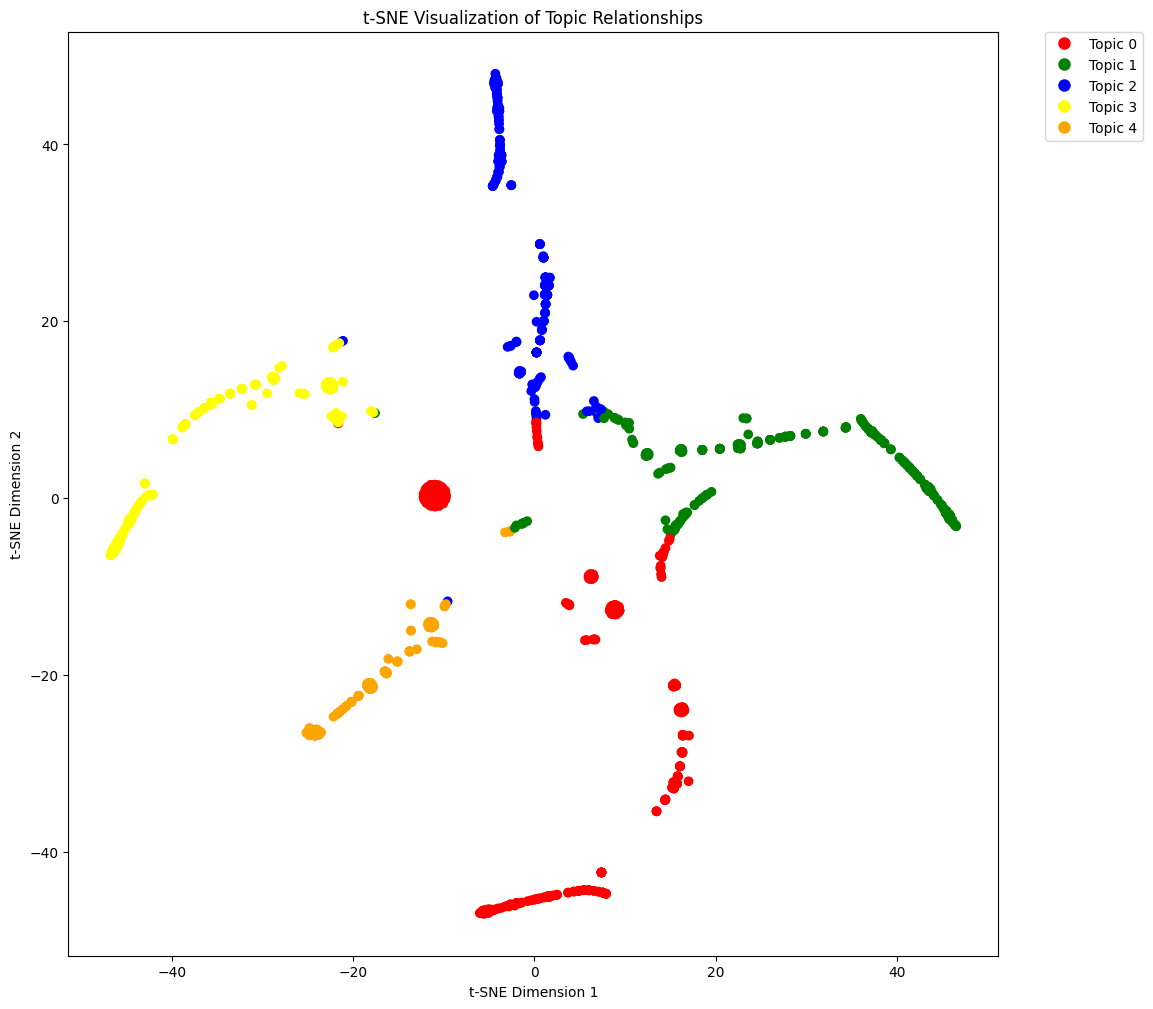

In [95]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# how to import Line2D
from matplotlib.lines import Line2D

# 假设你已经训练好了一个名为lda_model的主题模型

# 获取主题-词语分布矩阵
num_topics = lda_model.num_topics
topic_word_matrix = lda_model.get_topics()

color_dic = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'yellow',
    4: 'orange',
    5: 'cyan'
}

# 创建一个空列表来存储每个文档的主题分布
doc_topic_list = []
topic_colors = []

# 遍历每个文档并获取主题分布
for doc in corpus:
    arr = np.zeros(num_topics)
    for topic, prob in lda_model[doc]:
        arr[topic] = prob
    doc_topic_list.append(arr)
    topic_colors.append(color_dic[np.argmax(arr)])

# 将列表转换为NumPy数组
doc_topic_matrix = np.array(doc_topic_list)

# 计算每个主题向量
topic_vectors = np.dot(doc_topic_matrix, topic_word_matrix)

# 给每个主题分配颜色
# topic_colors = ['red', 'green', 'blue', 'yellow', 'orange']  # 自定义颜色列表，根据需要进行扩展
# 创建并拟合t-SNE模型
tsne_model = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne_model.fit_transform(topic_vectors)

# 绘制t-SNE图像
plt.figure(figsize=(12, 12))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=topic_colors)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Topic Relationships')

# 添加图例
legend_elements = []
for i in range(num_topics):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Topic {}'.format(i),
                                  markerfacecolor=color_dic[i], markersize=10))
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [71]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel

best_num_topics = None
best_perplexity = float('inf')
x_index = range(2, 20)
perplexity_mean = []
perplexity_std = []
coherence_mean = []
coherence_std = []

# 计算每个num_topics下的perplexity并选择最佳参数
for num_topics in x_index:

    perplexity_list = []
    coherence_list = []
    for i in range(3):
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=2)
        perplexity = -lda_model.log_perplexity(corpus)
        perplexity_list.append(perplexity)

        coherence_model = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_list.append(coherence_score)
    
    perplexity_mean.append(np.mean(perplexity_list))
    perplexity_std.append(np.std(perplexity_list))
    coherence_mean.append(np.mean(coherence_list))
    coherence_std.append(np.std(coherence_list))
    
    print('Number of Topics: {}, Perplexity: {} ± {}'.format(num_topics, np.mean(perplexity_list), np.std(perplexity_list)))
    print('Number of Topics: {}, Coherence Score: {} ± {}'.format(num_topics, np.mean(coherence_list), np.std(coherence_list)))


Number of Topics: 2, Perplexity: 7.101629478872496 ± 0.0067470556179766526
Number of Topics: 2, Coherence Score: 0.350277606198057 ± 0.01411696788476979
Number of Topics: 3, Perplexity: 7.147340294421611 ± 0.01171930084299216
Number of Topics: 3, Coherence Score: 0.34820637299807183 ± 0.02578711448037239
Number of Topics: 4, Perplexity: 7.2005523651984324 ± 0.002465874728613794
Number of Topics: 4, Coherence Score: 0.32947185569278575 ± 0.018927586962694868
Number of Topics: 5, Perplexity: 7.235965301726769 ± 0.00846339731128448
Number of Topics: 5, Coherence Score: 0.3757757404855984 ± 0.009374663693691616
Number of Topics: 6, Perplexity: 7.266410895910255 ± 0.005981557459522116
Number of Topics: 6, Coherence Score: 0.38058515664759957 ± 0.007111456372277167
Number of Topics: 7, Perplexity: 7.31548746279478 ± 0.008452799088526837
Number of Topics: 7, Coherence Score: 0.3682808309262115 ± 0.00712958047744646
Number of Topics: 8, Perplexity: 7.342040382745164 ± 0.003059866787322055
Numb

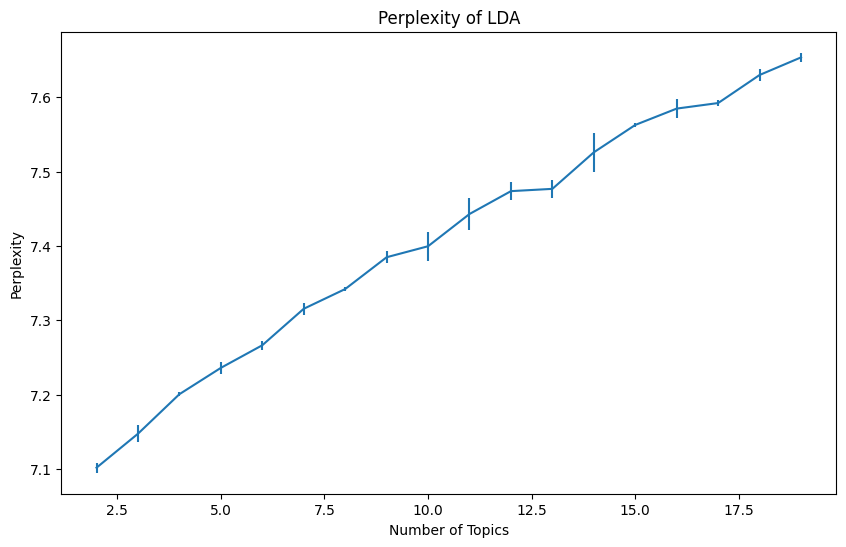

In [72]:
# draw a curve  for perplexity_mean and use perplexity_std to draw error bar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.errorbar(x_index, perplexity_mean, yerr=perplexity_std)
plt.title('Perplexity of LDA')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()


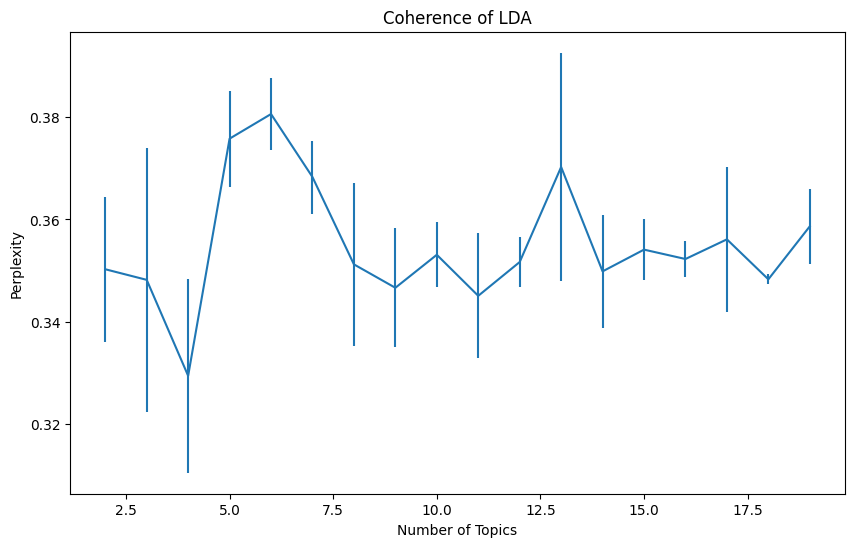

In [73]:
# draw a curve  for perplexity_mean and use perplexity_std to draw error bar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.errorbar(x_index, coherence_mean, yerr=coherence_std)
plt.title('Coherence of LDA')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()


In [98]:
i = 0
for topic in lda_model.print_topics(num_words = 50):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:   
        listItems = term.split('*')
        if i % 2 != 0:
            print('  ', listItems[1], '(', listItems[0], ')', sep='', end='\t')
        else:
            print('  ', listItems[1], '(', listItems[0], ')', sep='')
        i += 1
    print()
print('finish')

0:
  "学校" (0.018)
  "事情" ( 0.016)	  "彭斐章" ( 0.011)
  "文华图专" ( 0.009)	  "老师" ( 0.009)
  "两个" ( 0.008)	  "情况" ( 0.007)
  "学习" ( 0.007)	  "确实" ( 0.007)
  "时间" ( 0.006)	  "参加" ( 0.006)
  "苏联" ( 0.006)	  "工作" ( 0.006)
  "武汉大学" ( 0.005)	  "喜欢" ( 0.005)
  "专业" ( 0.005)	  "感觉" ( 0.005)
  "活动" ( 0.005)	  "研究" ( 0.004)
  "图书馆学" ( 0.004)	  "东西" ( 0.004)
  "参观_访问" ( 0.004)	  "发展" ( 0.004)
  "三个" ( 0.004)	  "访问" ( 0.004)
  "很大" ( 0.004)	  "图书馆" ( 0.004)
  "俄语" ( 0.004)	  "教授" ( 0.004)
  "地方" ( 0.004)	  "同志" ( 0.003)
  "傅敬生_同志" ( 0.003)	  "学生" ( 0.003)
  "回来" ( 0.003)	  "大学" ( 0.003)
  "有个" ( 0.003)	  "组织" ( 0.003)
  "中国" ( 0.003)	  "家里" ( 0.003)
  "教材" ( 0.003)	  "院长" ( 0.003)
  "参观" ( 0.003)	  "访学_时间" ( 0.003)
  "服务" ( 0.003)	  "农民" ( 0.003)
  "吃饭" ( 0.003)	  "几个" ( 0.003)
  "特别" ( 0.003)	  "同学" ( 0.003)
  "校长"( 0.003)	1:
  "学校" (0.023)
  "武汉大学" ( 0.010)	  "学生" ( 0.010)
  "参加" ( 0.010)	  "工作" ( 0.009)
  "研究" ( 0.009)	  "目录学" ( 0.008)
  "老师" ( 0.008)	  "毕业" ( 0.006)
  "发展" ( 0.006)	  "情况" ( 0.006)


In [18]:
d=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(d, 'lda.html')

In [5]:
train0=data.split(" ")
train=[]
for i in range(len(train0)):
    train1=[]
    train1.append(train0[i])
    train.append(train1)

print(train)

[['\ufeff'], ['青少年'], ['时代'], ['1930'], ['1951\r\n记忆\r\n1'], ['伯祖父'], ['取名'], ['斐章\r\n出'], ['生于'], ['1930年9月30日'], ['农历'], ['庚午年'], ['乙酉'], ['月'], ['癸未'], ['日'], ['家住'], ['湘阴县'], ['弼时公社'], ['现'], ['湖南省'], ['汨罗市弼时镇'], ['樟树桥'], ['家'], ['门前'], ['一条'], ['小溪'], ['溪'], ['上面'], ['一座'], ['桥'], ['溪'], ['两边'], ['不少'], ['樟树'], ['大家'], ['一带'], ['樟树桥'], ['彭氏'], ['算是'], ['当地'], ['大姓'], ['说'], ['典型'], ['名门望族\r\n家族'], ['大概'], ['情况'], ['祖父'], ['一辈'], ['上'], ['一辈'], ['家'], ['分家'], ['独立'], ['出来'], ['伯祖父'], ['叔'], ['祖父'], ['两家'], ['一起'], ['家'], ['一半'], ['两家'], ['一半'], ['伯祖父'], ['家'], ['相当于'], ['一半'], ['一半'], ['祖父'], ['没'], ['见'], ['据说'], ['父亲'], ['16'], ['岁'], ['左右'], ['去世'], ['祖母'], ['姓任'], ['不'], ['记得'], ['名字'], ['不怎么'], ['说'], ['女'], ['名字'], ['可能'], ['女'], ['都'], ['没'], ['名字'], ['开国元勋'], ['任弼时'], ['算是'], ['本家'], ['两'], ['人'], ['具体'], ['关系'], ['记不清'], ['楚\r\n\r\n2001年11月27日'], ['彭斐章'], ['先生'], ['中间'], ['参观'], ['任弼时'], ['同志'], ['故居\r\n祖父'], ['一辈'], ['人'], ['当中'], ['影响'], ['最大'], ['伯祖父'], ['彭伯樵'], ['饱读'],

In [7]:
dictionary = corpora.Dictionary(train)
dictionary.filter_extremes(no_below=2, no_above=0.1)

corpus = [dictionary.doc2bow(text) for text in train]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=50)
print('finish')

finish


In [8]:
for topic in lda.print_topics(num_words = 20):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
print('finish')

0:
  "不" (0.170)
  "去" ( 0.158)
  "好" ( 0.079)
  "确实" ( 0.040)
  "喜欢" ( 0.037)
  "年" ( 0.032)
  "日" ( 0.027)
  "几个" ( 0.027)
  "以前" ( 0.025)
  "不要" ( 0.024)
  "地方" ( 0.024)
  "书" ( 0.022)
  "不能" ( 0.021)
  "单位" ( 0.018)
  "2" ( 0.018)
  "不会" ( 0.018)
  "邓铭康" ( 0.016)
  "结束" ( 0.011)
  "小" ( 0.009)
  "机会"( 0.007)
1:
  "彭斐章" (0.073)
  "看" ( 0.067)
  "后" ( 0.065)
  "方面" ( 0.053)
  "不是" ( 0.052)
  "问题" ( 0.050)
  "两个" ( 0.039)
  "觉得" ( 0.038)
  "一定" ( 0.030)
  "新" ( 0.029)
  "走" ( 0.027)
  "爱人" ( 0.027)
  "问" ( 0.024)
  "照片" ( 0.020)
  "这次" ( 0.016)
  "长" ( 0.015)
  "出去" ( 0.014)
  "记得" ( 0.013)
  "总" ( 0.011)
  "下"( 0.010)
2:
  "很" (0.162)
  "说" ( 0.126)
  "研究" ( 0.071)
  "主要" ( 0.052)
  "参加" ( 0.050)
  "学习" ( 0.050)
  "大家" ( 0.045)
  "教育" ( 0.035)
  "俩" ( 0.026)
  "出" ( 0.017)
  "第一" ( 0.017)
  "买" ( 0.017)
  "负责" ( 0.016)
  "挺" ( 0.014)
  "期间" ( 0.012)
  "劳动" ( 0.012)
  "是从" ( 0.010)
  "岁" ( 0.010)
  "很好" ( 0.009)
  "评价"( 0.008)
3:
  "人" (0.220)
  "事情" ( 0.096)
  "写" ( 0.061)
  "应该" ( 0

In [11]:
d=pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.show(d)

IndexError: index 4550 is out of bounds for axis 1 with size 4550